### Imports

In [1]:
import cv2
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image

### Helper constants and functions

In [2]:
bioniko_height_p = 0.15
bioniko_width_p = 0.14
bioniko_aspect = 5.7
bioniko_font_factor = 1.35
base_limbus_center = (771, 763)
base_limbus_radius = 370
bioniko_source_limbus_center = (1031, 504)
bioniko_source_limbus_radius = 580
bioniko_source_text_start = 2010
bioniko_source_text_end = 2590

In [3]:
def linear_polar_norm(img, center, radius, flags=cv2.INTER_LINEAR):
    linear_polar = cv2.linearPolar(img, center, radius, flags)
    linear_polar = cv2.resize(linear_polar, (radius, round(2*np.pi*radius)))
    linear_polar = cv2.rotate(linear_polar, cv2.ROTATE_90_CLOCKWISE)
    
    return linear_polar

In [4]:
def write_bioniko(height, color=0, background=255):
    bioniko = background*np.ones((height,round(height*bioniko_aspect)))
    pil_im = Image.fromarray(bioniko)
    draw = ImageDraw.Draw(pil_im)
    font = ImageFont.truetype('data/century-gothic-bold.ttf', size=round(height*bioniko_font_factor))
    draw.text((0,0), 'BIONIKO', color, font=font, anchor='lt')
    bioniko = np.array(pil_im).astype('uint8')

    return bioniko

### Generating the base image

1. Loading

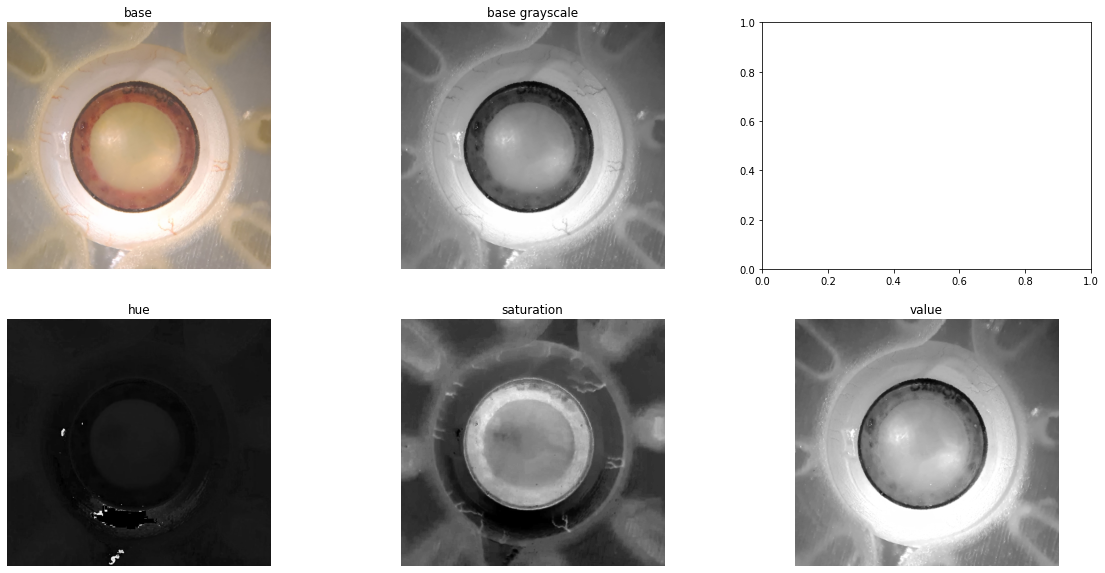

In [5]:
base = cv2.imread('data/artificial/base2.jpeg', cv2.IMREAD_COLOR)
base_rgb = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)
base_gray = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)
base_hsv = cv2.cvtColor(base, cv2.COLOR_BGR2HSV)

base_hue = base_hsv[:,:,0]
base_saturation = base_hsv[:,:,1]
base_value = base_hsv[:,:,2]

fig, ((plot1, plot2, _), (plot3, plot4, plot5)) = plt.subplots(2, 3, figsize=(20,10))
plot1.set_title('base')
plot1.imshow(base_rgb)
plot1.axis('off')

plot2.set_title('base grayscale')
plot2.imshow(base_gray, cmap=plt.cm.gray)
plot2.axis('off')

plot3.set_title('hue')
plot3.imshow(base_hue, cmap=plt.cm.gray)
plot3.axis('off')

plot4.set_title('saturation')
plot4.imshow(base_saturation, cmap=plt.cm.gray)
plot4.axis('off')

plot5.set_title('value')
plot5.imshow(base_value, cmap=plt.cm.gray)
plot5.axis('off')

plt.show()

2. Limbus mask

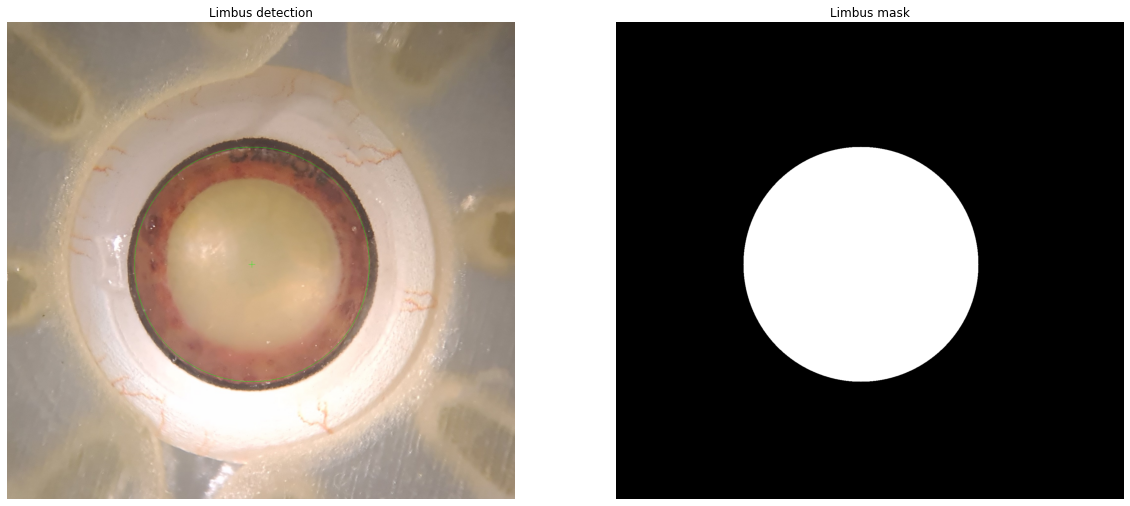

In [6]:
base_limbus_mask = np.zeros(base_value.shape, dtype=base_value.dtype)
cv2.circle(base_limbus_mask, base_limbus_center, base_limbus_radius, 255, cv2.FILLED)

base_circles = base_rgb.copy()
cv2.circle(base_circles, base_limbus_center, base_limbus_radius, (0,255,0), 1)
cv2.drawMarker(base_circles, base_limbus_center, (0,255,0))

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(20,10))
plot1.set_title('Limbus detection')
plot1.imshow(base_circles, cmap=plt.cm.gray)
plot1.axis('off')

plot2.set_title('Limbus mask')
plot2.imshow(base_limbus_mask, cmap=plt.cm.gray)
plot2.axis('off')

plt.show()

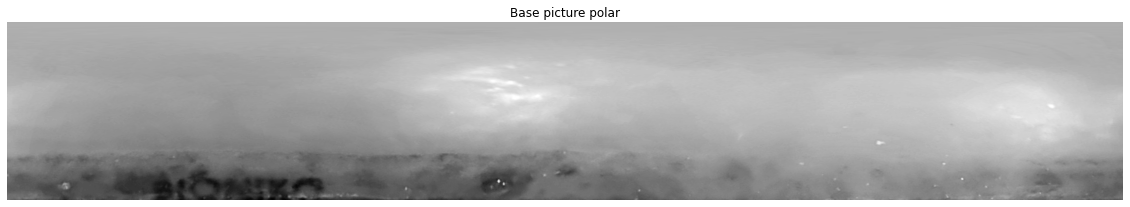

In [7]:
base_polar = linear_polar_norm(base_value, base_limbus_center, base_limbus_radius)

fig, plot1 = plt.subplots(1, 1, figsize=(20,10))
plot1.set_title('Base picture polar')
plot1.imshow(base_polar, cmap=plt.cm.gray)
plot1.axis('off')

plt.show()

### Generating the reference image

1. Loading

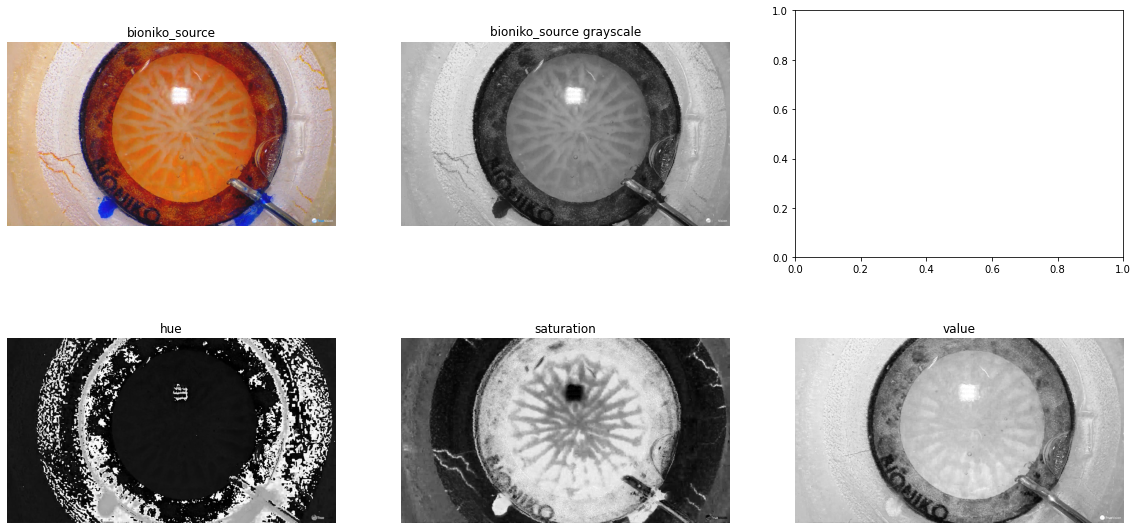

In [8]:
bioniko_source = cv2.imread('data/artificial/bioniko_reference_source.png', cv2.IMREAD_COLOR)
bioniko_source_rgb = cv2.cvtColor(bioniko_source, cv2.COLOR_BGR2RGB)
bioniko_source_gray = cv2.cvtColor(bioniko_source, cv2.COLOR_BGR2GRAY)
bioniko_source_hsv = cv2.cvtColor(bioniko_source, cv2.COLOR_BGR2HSV)

bioniko_source_hue = bioniko_source_hsv[:,:,0]
bioniko_source_saturation = bioniko_source_hsv[:,:,1]
bioniko_source_value = bioniko_source_hsv[:,:,2]

fig, ((plot1, plot2, _), (plot3, plot4, plot5)) = plt.subplots(2, 3, figsize=(20,10))
plot1.set_title('bioniko_source')
plot1.imshow(bioniko_source_rgb)
plot1.axis('off')

plot2.set_title('bioniko_source grayscale')
plot2.imshow(bioniko_source_gray, cmap=plt.cm.gray)
plot2.axis('off')

plot3.set_title('hue')
plot3.imshow(bioniko_source_hue, cmap=plt.cm.gray)
plot3.axis('off')

plot4.set_title('saturation')
plot4.imshow(bioniko_source_saturation, cmap=plt.cm.gray)
plot4.axis('off')

plot5.set_title('value')
plot5.imshow(bioniko_source_value, cmap=plt.cm.gray)
plot5.axis('off')

plt.show()

2. Limbus mask

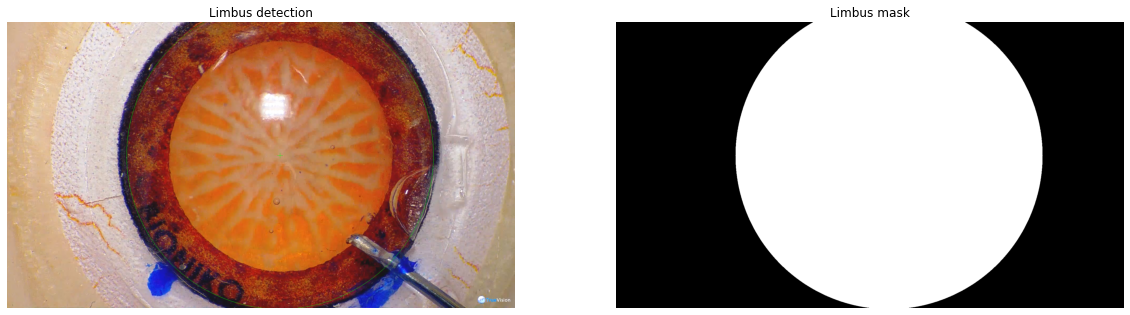

In [9]:
bioniko_source_limbus_mask = np.zeros(bioniko_source_value.shape, dtype=bioniko_source_value.dtype)
cv2.circle(bioniko_source_limbus_mask, bioniko_source_limbus_center, bioniko_source_limbus_radius, 255, cv2.FILLED)

bioniko_source_circles = bioniko_source_rgb.copy()
cv2.circle(bioniko_source_circles, bioniko_source_limbus_center, bioniko_source_limbus_radius, (0,255,0), 1)
cv2.drawMarker(bioniko_source_circles, bioniko_source_limbus_center, (0,255,0))

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(20,10))
plot1.set_title('Limbus detection')
plot1.imshow(bioniko_source_circles, cmap=plt.cm.gray)
plot1.axis('off')

plot2.set_title('Limbus mask')
plot2.imshow(bioniko_source_limbus_mask, cmap=plt.cm.gray)
plot2.axis('off')

plt.show()

3. Extracting the 'BIONIKO' text

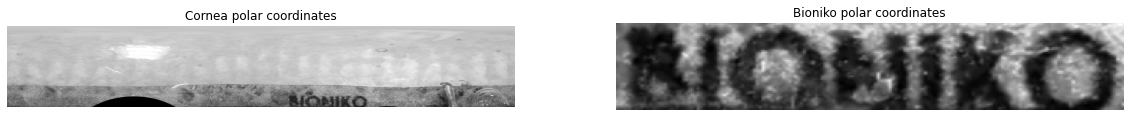

In [10]:
bioniko_source_polar = linear_polar_norm(
    bioniko_source_value,
    bioniko_source_limbus_center,
    bioniko_source_limbus_radius
)

bioniko_polar = bioniko_source_polar[
    round(bioniko_source_polar.shape[0]*(1 - bioniko_height_p)):,
    bioniko_source_text_start:bioniko_source_text_end
]

bioniko_polar = cv2.resize(
    bioniko_polar,
    (round(bioniko_width_p*base_polar.shape[1]),
     round(bioniko_height_p*base_polar.shape[0]))
)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(20,10))
plot1.set_title('Cornea polar coordinates')
plot1.imshow(bioniko_source_polar, cmap=plt.cm.gray)
plot1.axis('off')

plot2.set_title('Bioniko polar coordinates')
plot2.imshow(bioniko_polar, cmap=plt.cm.gray)
plot2.axis('off')

plt.show()

### Detecting 'BIONIKO' text

1. Template matching

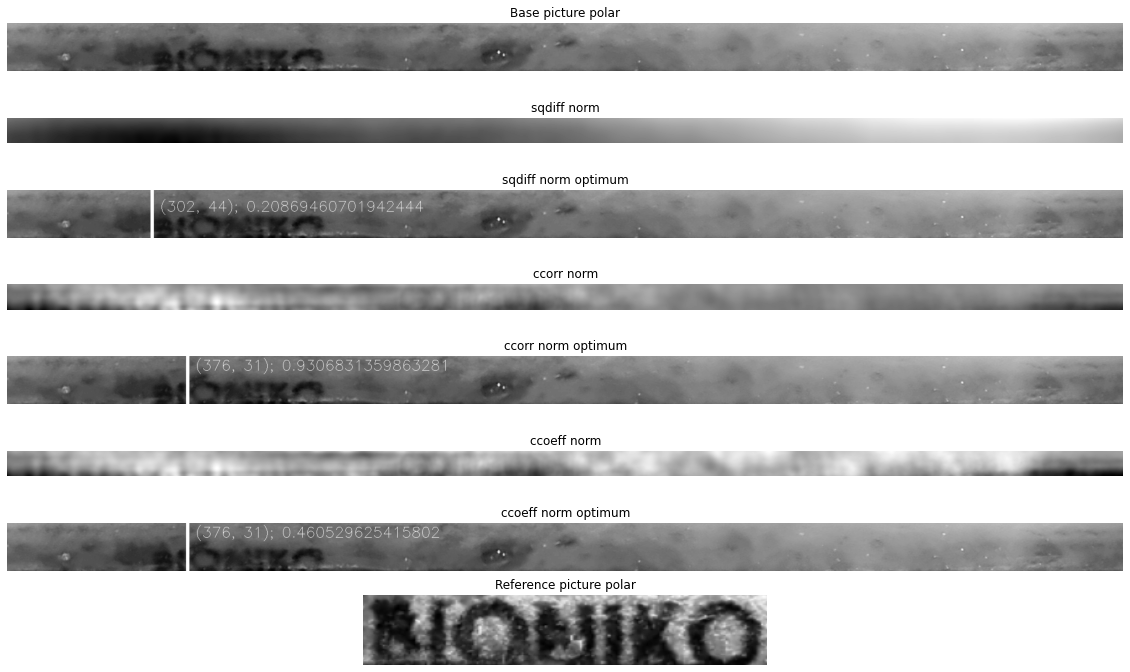

In [11]:
iris_polar =  base_polar.copy()
iris_polar = iris_polar[270:,:]

matching_sqdiff_norm = cv2.matchTemplate(iris_polar, bioniko_polar, cv2.TM_SQDIFF_NORMED)
iris_polar_sqdiff_norm = iris_polar.copy()
matching_ccorr_norm = cv2.matchTemplate(iris_polar, bioniko_polar, cv2.TM_CCORR_NORMED)
iris_polar_ccorr_norm = iris_polar.copy()
matching_ccoeff_norm = cv2.matchTemplate(iris_polar, bioniko_polar, cv2.TM_CCOEFF_NORMED)
iris_polar_ccoeff_norm = iris_polar.copy()

min_val, _, min_loc, _ = cv2.minMaxLoc(matching_sqdiff_norm)
cv2.line(iris_polar_sqdiff_norm, (min_loc[0],0), (min_loc[0],iris_polar.shape[0]-1), 255, 5)
cv2.putText(iris_polar_sqdiff_norm, ' %s; %s' % (min_loc, min_val), min_loc, cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
_, max_val, _, max_loc = cv2.minMaxLoc(matching_ccorr_norm)
cv2.line(iris_polar_ccorr_norm, (max_loc[0],0), (max_loc[0],iris_polar.shape[0]-1), 255, 5)
cv2.putText(iris_polar_ccorr_norm, ' %s; %s' % (max_loc, max_val), max_loc, cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
_, max_val, _, max_loc = cv2.minMaxLoc(matching_ccoeff_norm)
cv2.line(iris_polar_ccoeff_norm, (max_loc[0],0), (max_loc[0],iris_polar.shape[0]-1), 255, 5)
cv2.putText(iris_polar_ccoeff_norm, ' %s; %s' % (max_loc, max_val), max_loc, cv2.FONT_HERSHEY_SIMPLEX, 1, 255)

# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matching_ccoeff_norm)
# cv2.circle(matching_sqdiff_norm, max_loc, 10, 255, cv2.FILLED)

fig, plots = plt.subplots(8, 1, figsize=(20,12))
plots[0].set_title('Base picture polar')
plots[0].imshow(iris_polar, cmap=plt.cm.gray)
plots[0].axis('off')

plots[1].set_title('sqdiff norm')
plots[1].imshow(matching_sqdiff_norm, cmap=plt.cm.gray)
plots[1].axis('off')

plots[2].set_title('sqdiff norm optimum')
plots[2].imshow(iris_polar_sqdiff_norm, cmap=plt.cm.gray)
plots[2].axis('off')

plots[3].set_title('ccorr norm')
plots[3].imshow(matching_ccorr_norm, cmap=plt.cm.gray)
plots[3].axis('off')

plots[4].set_title('ccorr norm optimum')
plots[4].imshow(iris_polar_ccorr_norm, cmap=plt.cm.gray)
plots[4].axis('off')

plots[5].set_title('ccoeff norm')
plots[5].imshow(matching_ccoeff_norm, cmap=plt.cm.gray)
plots[5].axis('off')

plots[6].set_title('ccoeff norm optimum')
plots[6].imshow(iris_polar_ccoeff_norm, cmap=plt.cm.gray)
plots[6].axis('off')

plots[7].set_title('Reference picture polar')
plots[7].imshow(bioniko_polar, cmap=plt.cm.gray)
plots[7].axis('off')

plt.show()

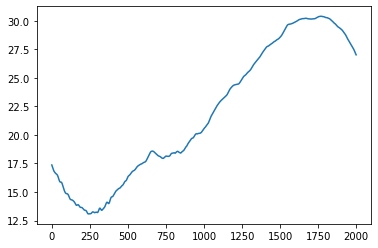

In [12]:
a = matching_sqdiff_norm
plt.plot(np.sum(a, axis=0))

2. Template matching using the original font

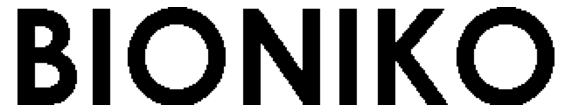

In [13]:
bioniko_polar_synth = write_bioniko(bioniko_polar.shape[0], background=100)

fig, plot1 = plt.subplots(1, 1, figsize=(10,10))
plot1.imshow(bioniko_polar_synth, cmap=plt.cm.gray)
plot1.axis('off')

plt.show()

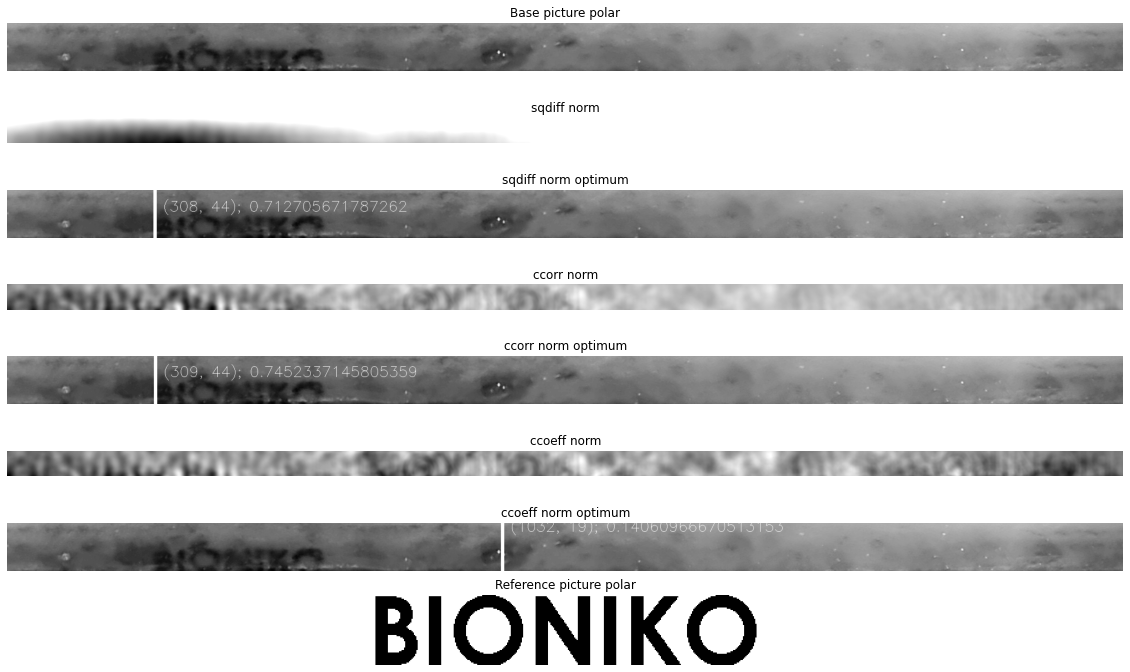

In [14]:
iris_polar =  base_polar.copy()
iris_polar = iris_polar[270:,:]

matching_sqdiff_norm = cv2.matchTemplate(iris_polar, bioniko_polar_synth, cv2.TM_SQDIFF_NORMED)
iris_polar_sqdiff_norm = iris_polar.copy()
matching_ccorr_norm = cv2.matchTemplate(iris_polar, bioniko_polar_synth, cv2.TM_CCORR_NORMED)
iris_polar_ccorr_norm = iris_polar.copy()
matching_ccoeff_norm = cv2.matchTemplate(iris_polar, bioniko_polar_synth, cv2.TM_CCOEFF_NORMED)
iris_polar_ccoeff_norm = iris_polar.copy()

min_val, _, min_loc, _ = cv2.minMaxLoc(matching_sqdiff_norm)
cv2.line(iris_polar_sqdiff_norm, (min_loc[0],0), (min_loc[0],iris_polar.shape[0]-1), 255, 5)
cv2.putText(iris_polar_sqdiff_norm, ' %s; %s' % (min_loc, min_val), min_loc, cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
_, max_val, _, max_loc = cv2.minMaxLoc(matching_ccorr_norm)
cv2.line(iris_polar_ccorr_norm, (max_loc[0],0), (max_loc[0],iris_polar.shape[0]-1), 255, 5)
cv2.putText(iris_polar_ccorr_norm, ' %s; %s' % (max_loc, max_val), max_loc, cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
_, max_val, _, max_loc = cv2.minMaxLoc(matching_ccoeff_norm)
cv2.line(iris_polar_ccoeff_norm, (max_loc[0],0), (max_loc[0],iris_polar.shape[0]-1), 255, 5)
cv2.putText(iris_polar_ccoeff_norm, ' %s; %s' % (max_loc, max_val), max_loc, cv2.FONT_HERSHEY_SIMPLEX, 1, 255)

fig, plots = plt.subplots(8, 1, figsize=(20,12))
plots[0].set_title('Base picture polar')
plots[0].imshow(iris_polar, cmap=plt.cm.gray)
plots[0].axis('off')

plots[1].set_title('sqdiff norm')
plots[1].imshow(matching_sqdiff_norm, cmap=plt.cm.gray)
plots[1].axis('off')

plots[2].set_title('sqdiff norm optimum')
plots[2].imshow(iris_polar_sqdiff_norm, cmap=plt.cm.gray)
plots[2].axis('off')

plots[3].set_title('ccorr norm')
plots[3].imshow(matching_ccorr_norm, cmap=plt.cm.gray)
plots[3].axis('off')

plots[4].set_title('ccorr norm optimum')
plots[4].imshow(iris_polar_ccorr_norm, cmap=plt.cm.gray)
plots[4].axis('off')

plots[5].set_title('ccoeff norm')
plots[5].imshow(matching_ccoeff_norm, cmap=plt.cm.gray)
plots[5].axis('off')

plots[6].set_title('ccoeff norm optimum')
plots[6].imshow(iris_polar_ccoeff_norm, cmap=plt.cm.gray)
plots[6].axis('off')

plots[7].set_title('Reference picture polar')
plots[7].imshow(bioniko_polar_synth, cmap=plt.cm.gray)
plots[7].axis('off')

plt.show()

3. Varying 'BIONIKO' size

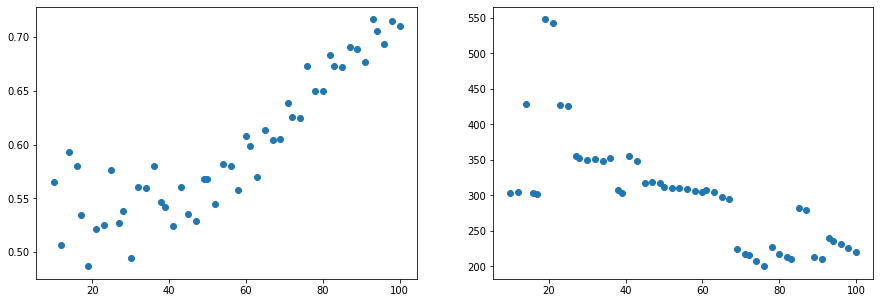

In [15]:
min_vals = []
min_locs = []

bioniko_sizes = np.round(np.linspace(0.1, 1)*iris_polar.shape[0]).astype('int')
for size in bioniko_sizes:
    bioniko_polar_synth = write_bioniko(size, background=120)
    matching_sqdiff_norm = cv2.matchTemplate(iris_polar, bioniko_polar_synth, cv2.TM_SQDIFF_NORMED)
    min_val, _, min_loc, _ = cv2.minMaxLoc(matching_sqdiff_norm)
    
    min_vals.append(min_val)
    min_locs.append(min_loc[0])
    
min_vals = np.array(min_vals)
min_locs = np.array(min_locs)
    
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(15,5))
plot1.scatter(bioniko_sizes, min_vals)
plot2.scatter(bioniko_sizes, min_locs)

plt.show()

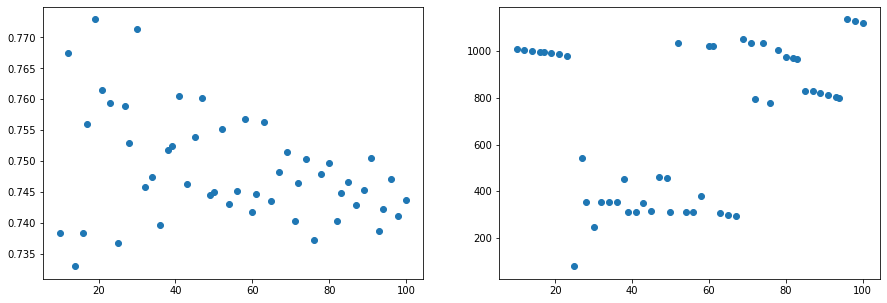

In [16]:
min_vals = []
min_locs = []

bioniko_sizes = np.round(np.linspace(0.1, 1)*iris_polar.shape[0]).astype('int')
for size in bioniko_sizes:
    bioniko_polar_synth = write_bioniko(size, background=2)
    matching_ccorr_norm = cv2.matchTemplate(iris_polar, bioniko_polar_synth, cv2.TM_CCORR_NORMED)
    _, min_val, _, min_loc = cv2.minMaxLoc(matching_ccorr_norm)
    
    min_vals.append(min_val)
    min_locs.append(min_loc[0])
    
min_vals = np.array(min_vals)
min_locs = np.array(min_locs)
    
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(15,5))
plot1.scatter(bioniko_sizes, min_vals)
plot2.scatter(bioniko_sizes, min_locs)

plt.show()